In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [3]:
df = pd.read_csv('2000_2021_Brazilian_North_Region_hourly_MWmed_hydroelectric_power_series_train.csv', parse_dates=['data'], index_col='data')

In [4]:
def rolling_mean(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(24*365).mean()
    rolstd = timeseries.rolling(24*365).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [5]:
def test_stationarity(timeseries): 
    # ADF Test
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

    # KPSS Test
    print('\nResults of KPSS Test:')
    result = kpss(timeseries, regression='c')
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[3].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

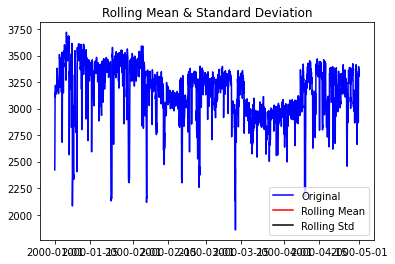

In [6]:
rolling_mean(df)

In [7]:
test_stationarity(df)

Results of Dickey-Fuller Test:
ADF Statistic: -6.34457307277134
p-value: 2.7026771131957073e-08
Critial Values:
   1%, -3.4326194625306883
Critial Values:
   5%, -2.862542695185102
Critial Values:
   10%, -2.567303763520961

Results of KPSS Test:
KPSS Statistic: 2.346276
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Users/nivaldogomes-labcodes/Documents/Dropbox/My Mac (Home-Nivaldos-MacBook-Pro.local)/Documents/1 - Projetos/modelagem analitica/.env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/nivaldogomes-labcodes/Documents/Dropbox/My Mac (Home-Nivaldos-MacBook-Pro.local)/Documents/1 - Projetos/modelagem analitica/.env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), Int